# Analyzing

Start with pre-reqs.

* Load modules
* Set visuals for matplotlib
* Load data to generic var

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams.update({"text.usetex": True, "font.family": "monospace", "font.size": "14"})

data = pd.read_json(open("reports/predictions.json", "r"), orient="index")
data

,prediction,exact_prediction,source
african_man.jpg,real,1.142970e-02,predict/stable-diffusion-turbo
african_person.jpg,real,4.324376e-03,predict/stable-diffusion-turbo
african_woman.jpg,real,9.800000e-09,predict/stable-diffusion-turbo
asian_man.jpg,real,2.099090e-03,predict/stable-diffusion-turbo
asian_person.jpg,real,7.597720e-05,predict/stable-diffusion-turbo
asian_woman.jpg,real,1.082998e-03,predict/stable-diffusion-turbo
black_man.jpg,real,5.988363e-04,predict/stable-diffusion-turbo
black_person.jpg,real,9.574029e-04,predict/stable-diffusion-turbo
black_woman.jpg,real,9.517600e-06,predict/stable-diffusion-turbo
latinx_man.jpg,real,2.559137e-04,predict/stable-diffusion-turbo


<Axes: >

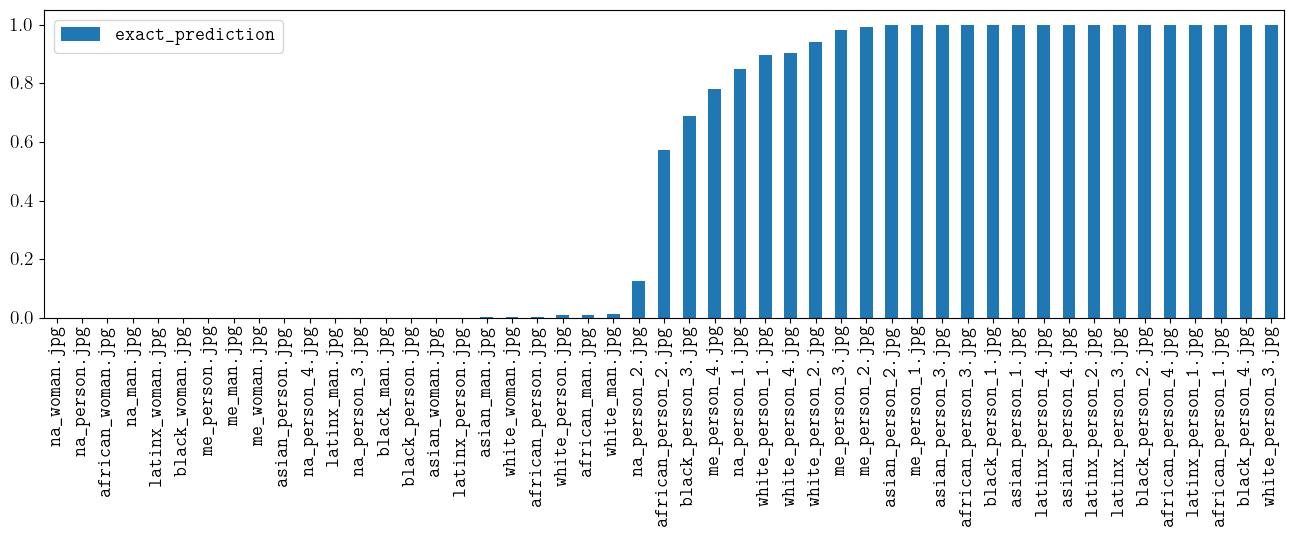

In [10]:
selected = data.sort_values(by=["exact_prediction"])
selected.plot.bar(y="exact_prediction", figsize=(16, 4))

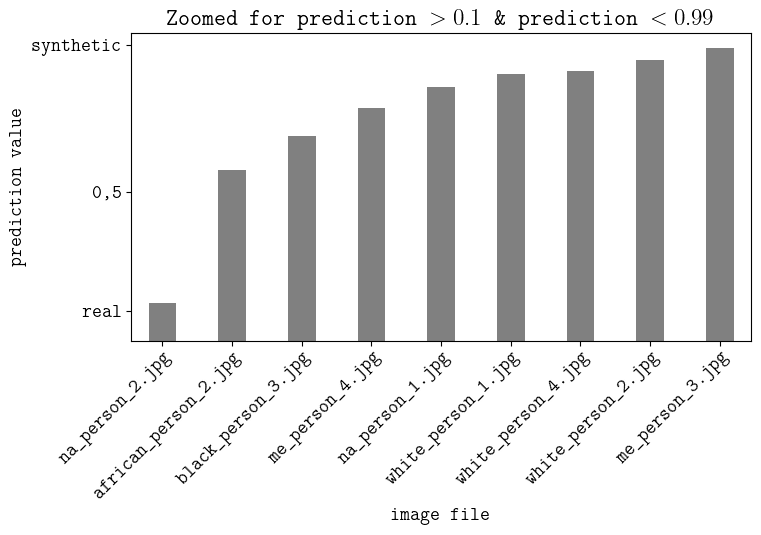

In [11]:
zoom_selected = selected[
    (selected.exact_prediction > 0.1) & (selected.exact_prediction < 0.99)
]
zoom_selected_ax = zoom_selected.plot.bar(
    y="exact_prediction", figsize=(8, 4), color="gray", width=0.4, legend=False
)
zoom_selected_ax.set_title("Zoomed for prediction \(> 0.1\) \& prediction \(< 0.99\)")
zoom_selected_ax.set_xlabel("image file")
zoom_selected_ax.set_ylabel("prediction value")
zoom_selected_ax.set_yticks([0.1, 0.5, 0.99])
zoom_selected_ax.set_yticklabels(["real", "0,5", "synthetic"])
zoom_selected_bar = plt.setp(
    zoom_selected_ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor"
)

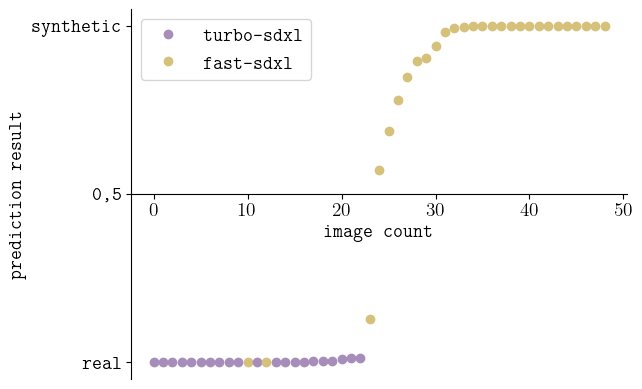

In [12]:
# Subdivide our measures based on image source

selected.source.mask(
    selected.source == "predict/fast-sdxl", "#d6c17a", inplace=True
)
selected.source.mask(
    selected.source == "predict/stable-diffusion-turbo", "#a78dba", inplace=True
)

selected_fig = plt.figure()
selected_ax = selected_fig.add_subplot(1, 1, 1)

# Format
selected_ax.spines["bottom"].set_position("center")
selected_ax.spines["right"].set_color("none")
selected_ax.spines["top"].set_color("none")
selected_ax.set_ylabel("prediction result")
selected_ax.set_yticks([0, 0.5, 1])
selected_ax.set_yticklabels(["real", "0,5", "synthetic"])
selected_ax.set_xlabel("image count")

# Build
count = 0
for _, i in selected.iterrows():
    plt.plot(
        count,
        i.exact_prediction,
        label='fast-sdxl' if i.source == "#d6c17a" else 'turbo-sdxl',
        color=i.source,
        linestyle="",
        marker="o",
    )
    count += 1

# Legend
handles, labels = selected_ax.get_legend_handles_labels()
unique = [(handle, label) for i, (handle, label) in enumerate(zip(handles, labels)) if label not in labels[:i]]
selected_ax.legend(*zip(*unique))

# Display
plt.show()